In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import data_utils

param_dict: {'epochs': [200], 'batch_size': [200], 'save_every': [5], 'learning_rate': [0.001], 'test_size': [0.2], 'seed': [398], 'hidden_size': [10], 'bias': [True], 'dropout_rate': [0.1], 'ode_nn': [((50, 'tanh'), (50, 'tanh'))], 'readout_nn': [((50, 'tanh'), (50, 'tanh'))], 'enc_nn': [((50, 'tanh'), (50, 'tanh'))], 'use_rnn': [False], 'func_appl_X': [[]], 'solver': ['euler'], 'weight': [0.5], 'weight_decay': [1.0], 'dataset': ['BlackScholes', 'Heston', 'OrnsteinUhlenbeck'], 'dataset_id': [None], 'plot': [True], 'evaluate': [True], 'paths_to_plot': [(0, 1, 2, 3, 4)]}
param_dict: {'epochs': [100], 'batch_size': [20], 'save_every': [10], 'learning_rate': [0.001], 'test_size': [0.2], 'training_size': [200, 400, 800, 1600, 3200, 6400, 12800], 'seed': [398], 'hidden_size': [10], 'bias': [True], 'dropout_rate': [0.1], 'ode_nn': [((10, 'tanh'), (10, 'tanh'))], 'readout_nn': [((10, 'tanh'), (10, 'tanh'))], 'enc_nn': [((10, 'tanh'), (10, 'tanh'))], 'use_rnn': [False], 'func_appl_X': [[]], 's

In [2]:
import NJODE.train as train
vol_dataset_dic = {
    'volatility': np.array([0.3]).tolist(),
    'drift': np.array([0.5]).tolist(),
    'nb_paths': 1000,
    'nb_steps': 100,
    'S0': np.array([2]).tolist(),
    'maturity': 1.0,
    'dimension': 1,
    'obs_perc': 1.0,
    'scheme': 'euler',
    'model_name': 'BlackScholesForZ',
    'dt': 0.01}
datasetpath, dataset_id = data_utils.create_dataset("BlackScholesForZ",vol_dataset_dic)
train.train(dataset="BlackScholesForZ", dataset_id = dataset_id, use_cond_exp=False, eval_use_true_paths=True, plot=True,  which_loss = 'easy_vol')

param_dict: {'epochs': [200], 'batch_size': [200], 'save_every': [5], 'learning_rate': [0.001], 'test_size': [0.2], 'seed': [398], 'hidden_size': [10], 'bias': [True], 'dropout_rate': [0.1], 'ode_nn': [((50, 'tanh'), (50, 'tanh'))], 'readout_nn': [((50, 'tanh'), (50, 'tanh'))], 'enc_nn': [((50, 'tanh'), (50, 'tanh'))], 'use_rnn': [False], 'func_appl_X': [[]], 'solver': ['euler'], 'weight': [0.5], 'weight_decay': [1.0], 'dataset': ['BlackScholes', 'Heston', 'OrnsteinUhlenbeck'], 'dataset_id': [None], 'plot': [True], 'evaluate': [True], 'paths_to_plot': [(0, 1, 2, 3, 4)]}
param_dict: {'epochs': [100], 'batch_size': [20], 'save_every': [10], 'learning_rate': [0.001], 'test_size': [0.2], 'training_size': [200, 400, 800, 1600, 3200, 6400, 12800], 'seed': [398], 'hidden_size': [10], 'bias': [True], 'dropout_rate': [0.1], 'ode_nn': [((10, 'tanh'), (10, 'tanh'))], 'readout_nn': [((10, 'tanh'), (10, 'tanh'))], 'enc_nn': [((10, 'tanh'), (10, 'tanh'))], 'use_rnn': [False], 'func_appl_X': [[]], 's

FileNotFoundError: [Errno 2] No such file or directory: '../data/training_data/BlackScholesForZ-88/metadata.txt'

In [10]:
mu_dataset_dic = {
    'volatility': 0.3,
    'drift': 0.5,
    'nb_paths': 1000,
    'nb_steps': 100,
    'S0': 2,
    'maturity': 1.0,
    'dimension': 1,
    'obs_perc': 1.0,
    'scheme': 'euler',
    'model_name': 'BlackScholes',
    'dt': 0.01
}
datasetpath_mu, dataset_id_mu = data_utils.create_dataset("BlackScholes",mu_dataset_dic)

In [ ]:
train.train(dataset="BlackScholes", dataset_id=dataset_id_mu, use_cond_exp=True,plot=True, which_loss ='easy')

In [3]:
params_dict_mu = {
    'input_size': 1,
    'hidden_size': 10,
    'output_size': 1,
    'ode_nn': ((50, "tanh"), (50, "tanh")),
    'readout_nn': ((50, "tanh"), (50, "tanh")),
    'enc_nn': ((50, "tanh"), (50, "tanh")),
    'use_rnn': False,
    'options': {'which_loss': 'easy'},
    "input_coords": np.arange(1),
    "output_coords": np.arange(1),
    "signature_coords": np.arange(1)
}
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
from models import get_ckpt_model, NJODE
mu_model = NJODE(**params_dict_mu).to(device)
optimizer = torch.optim.Adam(mu_model.parameters())
get_ckpt_model("../data/saved_models/id-77/best_checkpoint/", mu_model, optimizer, device)
mu_model.eval()

using loss: easy
neuralODE use input scaling with tanh
use residual network: input_size=1, output_size=10
use residual network: input_size=10, output_size=1


NJODE(
  (ode_f): ODEFunc(
    (f): Sequential(
      (0): Linear(in_features=13, out_features=50, bias=True)
      (1): Tanh()
      (2): Dropout(p=0, inplace=False)
      (3): Linear(in_features=50, out_features=50, bias=True)
      (4): Tanh()
      (5): Dropout(p=0, inplace=False)
      (6): Linear(in_features=50, out_features=10, bias=True)
    )
  )
  (encoder_map): FFNN(
    (ffnn): Sequential(
      (0): Linear(in_features=1, out_features=50, bias=True)
      (1): Tanh()
      (2): Dropout(p=0, inplace=False)
      (3): Linear(in_features=50, out_features=50, bias=True)
      (4): Tanh()
      (5): Dropout(p=0, inplace=False)
      (6): Linear(in_features=50, out_features=10, bias=True)
    )
  )
  (readout_map): FFNN(
    (ffnn): Sequential(
      (0): Linear(in_features=10, out_features=50, bias=True)
      (1): Tanh()
      (2): Dropout(p=0, inplace=False)
      (3): Linear(in_features=50, out_features=50, bias=True)
      (4): Tanh()
      (5): Dropout(p=0, inplace=False)
 

In [4]:
params_dict_vol = {
    'input_size': 1,
    'hidden_size': 10,
    'output_size': 1,
    'ode_nn': ((50, "tanh"), (50, "tanh")),
    'readout_nn': ((50, "tanh"), (50, "tanh")),
    'enc_nn': ((50, "tanh"), (50, "tanh")),
    'use_rnn': False,
    'options': {'which_loss': 'easy_vol'},
    "input_coords": np.arange(1),
    "output_coords": np.arange(1),
    "signature_coords": np.arange(1)
}
vol_model = NJODE(**params_dict_vol).to(device)
optimizer_vol = torch.optim.Adam(vol_model.parameters())
get_ckpt_model("../data/saved_models/id-67/best_checkpoint/", vol_model, optimizer_vol, device)
vol_model.eval()

using loss: easy_vol
neuralODE use input scaling with tanh
use residual network: input_size=1, output_size=10
use residual network: input_size=10, output_size=1


NJODE(
  (ode_f): ODEFunc(
    (f): Sequential(
      (0): Linear(in_features=13, out_features=50, bias=True)
      (1): Tanh()
      (2): Dropout(p=0, inplace=False)
      (3): Linear(in_features=50, out_features=50, bias=True)
      (4): Tanh()
      (5): Dropout(p=0, inplace=False)
      (6): Linear(in_features=50, out_features=10, bias=True)
    )
  )
  (encoder_map): FFNN(
    (ffnn): Sequential(
      (0): Linear(in_features=1, out_features=50, bias=True)
      (1): Tanh()
      (2): Dropout(p=0, inplace=False)
      (3): Linear(in_features=50, out_features=50, bias=True)
      (4): Tanh()
      (5): Dropout(p=0, inplace=False)
      (6): Linear(in_features=50, out_features=10, bias=True)
    )
  )
  (readout_map): FFNN(
    (ffnn): Sequential(
      (0): Linear(in_features=10, out_features=50, bias=True)
      (1): Tanh()
      (2): Dropout(p=0, inplace=False)
      (3): Linear(in_features=50, out_features=50, bias=True)
      (4): Tanh()
      (5): Dropout(p=0, inplace=False)
 

In [5]:
 def generate_next_value( X_t, mu_t, sigma_t, delta_t):
    """
    Generate the next value in the time series using the Euler-Maruyama scheme.

    :param X_t: current value tensor of shape (batch_size, d)
    :param mu_t: drift coefficient tensor of shape (batch_size, d)
    :param sigma_t: diffusion coefficient tensor of shape ( d, d)
    :param delta_t: time difference float
    :return: next value tensor of shape (batch_size, d)
    """

    delta_Wt = torch.randn_like(X_t) * np.sqrt(delta_t)
    delta_Wt_sigma_t = torch.bmm(delta_Wt.unsqueeze(1), sigma_t).squeeze(1)
    X_t_next = X_t + mu_t * delta_t + delta_Wt_sigma_t

    return X_t_next

In [45]:
batch_size=100
dim=1
times=np.array([])
time_ptr = np.array([0])
obs_idx = torch.tensor([],dtype=torch.long)
start_Z = torch.tensor(np.zeros((1,)), dtype=torch.float).unsqueeze(0)
start_Z = start_Z.repeat(batch_size, dim)
Z = torch.tensor([], dtype=torch.float)
delta_t=0.01
X= torch.tensor([], dtype=torch.float)
start_X = torch.tensor([1.0], dtype=torch.float).unsqueeze(0)
start_X = start_X.repeat(batch_size, dim)
n_obs_ot=torch.tensor([0]*batch_size, dtype=torch.float)

for i in range(1, 101):

    T=delta_t*i
    mu_pred=mu_model.get_pred(times, time_ptr, X, obs_idx, delta_t, T, start_X, n_obs_ot)["pred"][-1]

    if i==1:
        X_t=start_X
    elif i==2:
        X_t = X[:batch_size*(i-1),:]
        X_t_minus = start_X
        # Compute the difference
        diff = X_t - X_t_minus

        # Compute the outer product for each element in the batch
        # diff.unsqueeze(2) has shape (batch_size, dim, 1)
        # diff.unsqueeze(1) has shape (batch_size, 1, dim)
        Z_tensor = diff.unsqueeze(2) @ diff.unsqueeze(1)
        Z=torch.cat((Z,Z_tensor.view(batch_size,-1)))

    else:
        X_t = X[batch_size*(i-2):,:]
        X_t_minus = X[batch_size*(i-3):batch_size*(i-2), :]
        # Compute the difference
        diff = X_t - X_t_minus

        # Compute the outer product for each element in the batch
        # diff.unsqueeze(2) has shape (batch_size, dim, 1)
        # diff.unsqueeze(1) has shape (batch_size, 1, dim)
        Z_tensor = diff.unsqueeze(2) @ diff.unsqueeze(1)
        Z=torch.cat((Z,Z_tensor.view(batch_size,-1)))



    sigma_pred=vol_model.get_pred(times, time_ptr, Z, obs_idx, delta_t, T, start_Z, n_obs_ot )["pred"][-1]

    mu_hat_t = (mu_pred - X_t)/delta_t
    sigma_hat_t = sigma_pred.view(batch_size, dim, dim)/np.sqrt(delta_t)

    X_next = generate_next_value(X_t, mu_hat_t, sigma_hat_t, delta_t)

    X= torch.cat((X, X_next), dim=0)
    times=np.append(times, delta_t*i)
    time_ptr = np.append(time_ptr, i*batch_size)
    obs_idx=torch.cat((obs_idx, torch.arange(batch_size)))
    n_obs_ot+=torch.tensor([1]*batch_size, dtype=torch.float)
X_new = X.view(100, batch_size, dim).permute(1, 2, 0)
start_X_expanded = start_X.unsqueeze(0).permute(1,0,2)
X_final=torch.cat((start_X_expanded, X_new), dim=2)

In [17]:
X_final.shape

torch.Size([10, 1, 101])

In [8]:
data=np.load("../data/training_data/BlackScholes-86/data.npy")

In [9]:
data.shape

(1000, 1, 101)

In [63]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch

# Compare (visualize) paths
def compare_path(x_real, x_fake, titles=["Real", "Fake"], file_path=None, return_figax=False, dim=0, plot_size=100):
    fig, ax = plt.subplots(1, 2, figsize=[12, 4], sharex=True, sharey=True)
    ax[0].plot(
        x_real[:plot_size].numpy().T,
        alpha=0.3,
        marker="o",
        linewidth=1,
        markersize=1,
    )

    ax[1].plot(
        x_fake[:plot_size].numpy().T,
        alpha=0.3,
        marker="o",
        linewidth=1,
        markersize=1,
    )

    if titles:
        ax[0].set_title(titles[0])
        ax[1].set_title(titles[1])

    for i in range(2):
        ax[i].set_xlabel("Time")
        ax[i].set_ylabel("Prices")
    if return_figax:
        return fig, ax
    if file_path is None:
        plt.show()
    else:
        fig.savefig(os.path.join(file_path, 'bs_price.png'))
    plt.close()

In [51]:
real_data = torch.tensor(data[:, 0, :])
fake_data = X_final[:,0,:].detach()

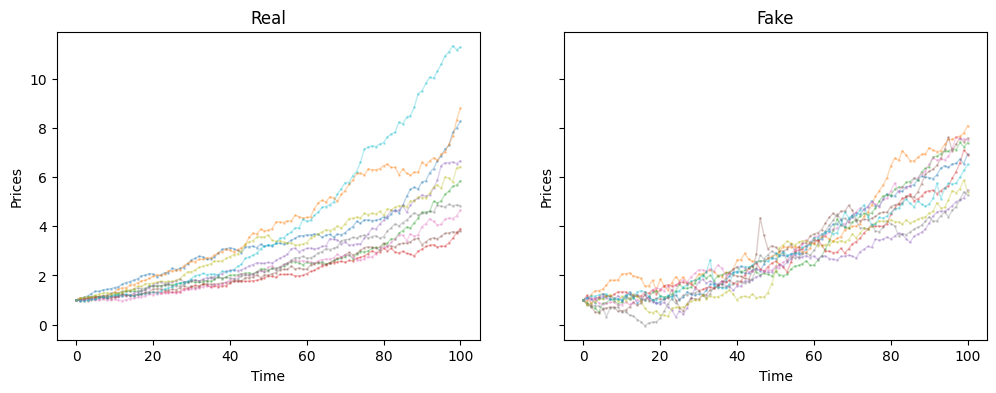

In [71]:
compare_path(real_data,fake_data,plot_size=10)

In [27]:
import os

In [67]:
def estimate_params(X, dt=0.01):
    #log_rets=np.log(X[:,1:]/X[:,:-1])
    log_rets=X[:,1:]/X[:,:-1]-1
    r=log_rets.ravel()

    m=np.mean(r)
    s=np.std(r,ddof=1)

    sigma=s/np.sqrt(dt)
    mu=(m/dt)+0.5*sigma**2

    return mu, sigma

In [68]:
estimate_params(data[:100,0,:])

(1.9885902875606571, 0.29628178491245255)

In [69]:
estimate_params(fake_data.numpy())

(4.258583081061618, 1.9924142956733704)

In [58]:
# Compare Marginal
def compare_marginal_hist(real_data, fake_data, n_time_slice=4, file_path=None):
    time_range = np.linspace(11, real_data.shape[1] - 1, n_time_slice, dtype=int)
    n_cols = n_time_slice
    fig, ax = plt.subplots(1, n_cols, figsize=[12, 4], sharey=True, sharex=True)
    bins = np.linspace(0, 5, 50)
    for i in range(n_cols):
        axi = ax.flat[i]
        n = time_range[i]
        axi.hist(real_data[:, n], bins=bins, alpha=0.5, label="real")
        axi.hist(fake_data[:, n], bins=bins, alpha=0.3, label="fake")
        axi.set_title(f"Time: {n}")
        axi.legend()
        # axi.set_xlabel("Marginal prices")
    if file_path is None:
        plt.show()
    else:
        plt.savefig(file_path, bbox_inches="tight")
        plt.close(fig)

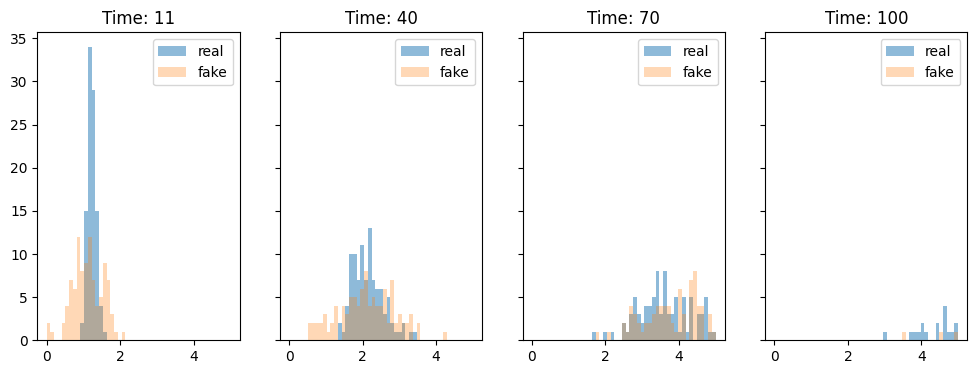

In [60]:
compare_marginal_hist(real_data[:100], fake_data, 4)

In [61]:
# Compare Drift and Volatility
def prices2returns(prices):
    returns = prices[:, 1:] / prices[:, :-1] - 1
    return returns


def compute_volatility(price_path, T):
    return_path = prices2returns(price_path)
    vol2 = torch.sum(return_path**2, dim=1) / T
    vol = torch.sqrt(vol2)
    return vol


def compute_drift(price_path, T):
    return_path = prices2returns(price_path)
    drift = torch.sum(return_path, dim=1) / T
    return drift


def plot_mean_log_prices(data, data_name, axi):
    data = torch.log(data)
    data_mean = torch.mean(data, dim=0)
    data_std = torch.std(data, dim=0)
    axi.plot(data_mean, marker="o", linewidth=1, markersize=1, label=data_name)
    axi.fill_between(
        torch.arange(len(data_mean)),
        data_mean - data_std,
        data_mean + data_std,
        alpha=0.2,
    )


def compare_drift_volatility(real_data, fake_data, T):
    fig, ax = plt.subplots(1, 2, figsize=[12, 4])

    plot_mean_log_prices(real_data, "real", ax[0])
    plot_mean_log_prices(fake_data, "fake", ax[0])
    ax[0].legend()
    ax[0].set_xlabel("Time")
    ax[0].set_title("Log-prices")

    vol = compute_volatility(real_data, T)
    ax[1].hist(vol, bins=100, alpha=0.4, label="real", density=True)
    # sns.kdeplot(vol,ax = ax[1])
    vol = compute_volatility(fake_data, T)
    ax[1].hist(vol, bins=100, alpha=0.4, label="fake", density=True)
    # sns.kdeplot(vol,ax = ax[1])
    ax[1].legend()
    ax[1].set_title("Volatility")
    ax[1].set_xlabel("Volatility")

    plt.show()

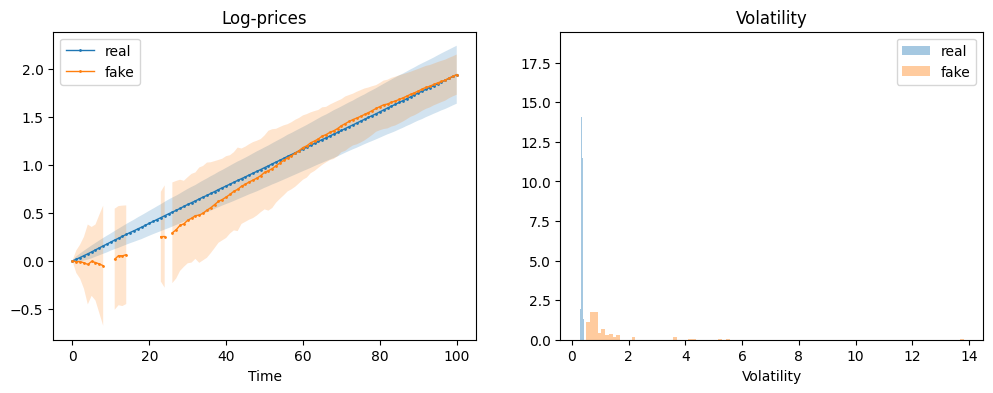

In [62]:
compare_drift_volatility(real_data,fake_data, 1)